# Классификация: Логистическая регрессия и SVM

1. Получаем данные и загружаем их в рабочую среду.

In [1]:
import pandas as pd

In [2]:
# Загрузка данных из файла
file_path = 'C:/Users/Yaros/Downloads/Лекция_2/Лекция_2/adult.csv'
data = pd.read_csv(file_path)

2. Проведём первичный анализ.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


*Датасет содержит 48,842 записи и 15 столбцов.*  
*Столбцы включают числовые (6 столбцов) и категориальные (9 столбцов) данные.*

3. Проверим данные на пропуски. Удаляем в случае обнаружения.  *Предложите альтернативный способ работы с пропусками

In [5]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

*При поиске пропущеных значений, таких как NaN, обнаружено не было. Но в некоторых строках встречаюся вопросительные знаки "?", что может указывать на пропуски. Проверим эти значения*

In [6]:
missing_values_counts = (data == '?').sum()
missing_values_counts[missing_values_counts > 0]

workclass         2799
occupation        2809
native-country     857
dtype: int64

In [7]:
# Удаление строк с пропусками
data_cleaned = data.replace('?', pd.NA).dropna()
data_cleaned = data.dropna()

# Проверка размеров нового датасета
data_cleaned.shape

(48842, 15)

*Датасет уменьшился до 45,222 записей (изначально было 48,842).*

*Альтернативные способы работы с пропусками*  
  
*Замена пропусков на наиболее часто встречающееся значение в столбце. Это подходит для категориальных данных, где можно выбрать моду (самое частое значение) в качестве замены пропусков.*  
  
*Замена на среднее/медиану в случае числовых данных. Это может быть подходящим выбором, если пропуски встречаются в числовом столбце и распределение данных близко к нормальному (для среднего) или сильно искажено (для медианы).*  
  
*Использование моделей машинного обучения для предсказания пропущенных значений, особенно если пропуски могут быть систематическими.*

4. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

*Построим график распределение возраста с учетом уровня дохода* 

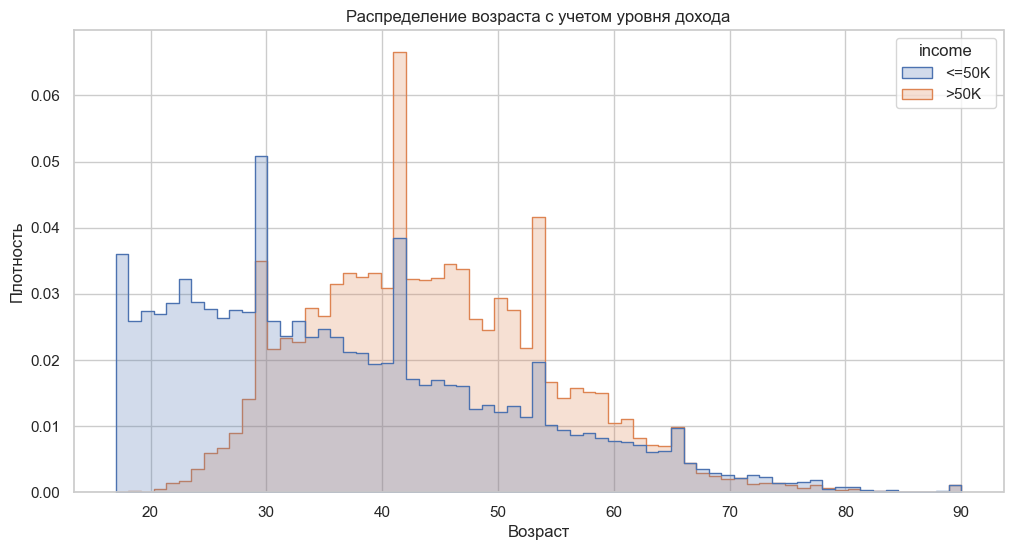

In [9]:
# Настройка стиля графиков
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x="age", hue="income", element="step", stat="density", common_norm=False)
plt.title("Распределение возраста с учетом уровня дохода")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.show()

*Здесь можно сделать следующие выводы:*  
  
*- Люди с доходом более 50K в год в среднем старше, чем те, кто зарабатывает меньше 50K.*  
  
*- Пиковый возраст для группы с доходом менее 50K приходится примерно на 25 лет, тогда как для группы с более высоким доходом пик находится около 45 лет.*  
  
*- Распределение возраста для более высокого дохода более плоское, что указывает на большее разнообразие возрастов среди этой группы.*

*Теперь построим второй график - среднее количество рабочих часов в неделю по разным профессиям.*

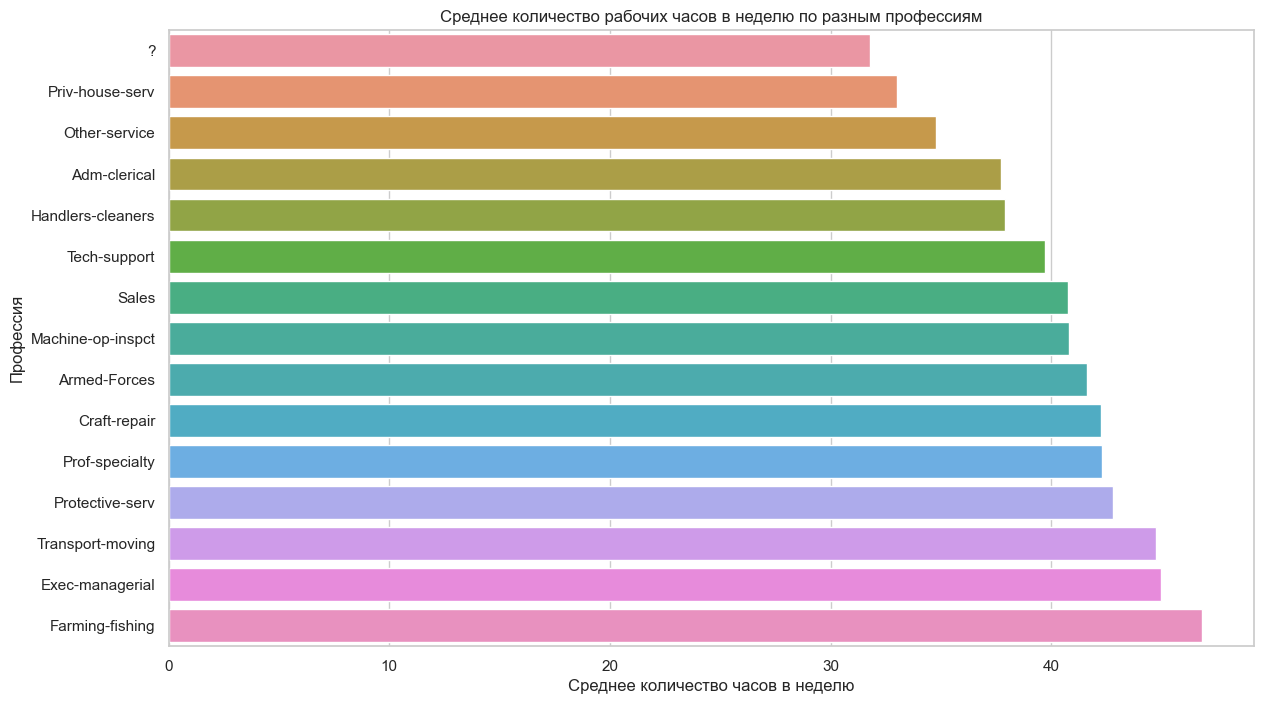

In [10]:
plt.figure(figsize=(14, 8))
average_hours = data_cleaned.groupby('occupation')['hours-per-week'].mean().sort_values()
sns.barplot(x=average_hours.values, y=average_hours.index)
plt.title("Среднее количество рабочих часов в неделю по разным профессиям")
plt.xlabel("Среднее количество часов в неделю")
plt.ylabel("Профессия")
plt.show()

Исходя из этих метрик, можно сделать следующие выводы:  
  
*- Профессии, такие как "Farming-fishing", "Exec-managerial" и "Transport-moving", в среднем имеют более длительную рабочую неделю.*  
  
*- С другой стороны, профессии вроде "Priv-house-serv", "Other-service" и "Tech-support" характеризуются меньшим средним количеством рабочих часов.*  
  
*- Эта визуализация может быть полезна для понимания рабочей нагрузки в различных сферах деятельности.*

5. Преобразуйте категориальные признаки.

In [11]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [12]:
# One-Hot Encoding для выбранных признаков
one_hot_columns = ['workclass', 'marital-status', 'relationship', 'race', 'gender']
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data_cleaned[one_hot_columns])

In [13]:
# Конвертация One-Hot Encoded данных обратно в DataFrame
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(one_hot_columns))

In [14]:
# Label Encoding для 'education' и 'occupation'
label_columns = ['education', 'occupation', 'income', 'native-country']
label_encoder = LabelEncoder()
for col in label_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

In [15]:
# Проверим, есть ли столбцы в data_encoded перед их удалением
columns_exist = [col for col in one_hot_columns if col in data_cleaned.columns]

# Если столбцы существуют, удалим их
if columns_exist:
    data_cleaned = data_cleaned.drop(columns_exist, axis=1)

# Слияние One-Hot Encoded столбцов обратно с основным датасетом
data_encoded = pd.concat([data_cleaned, one_hot_encoded_df], axis=1)

In [16]:
data_encoded.head()

,age,fnlwgt,education,educational-num,occupation,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,25,226802,1,7,7,0,0,40,39,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,38,89814,11,9,5,0,0,50,39,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,28,336951,7,12,11,0,0,40,39,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,44,160323,15,10,7,7688,0,40,39,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,18,103497,15,10,0,0,0,30,39,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


6. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [21]:
# Определение переменных X и y
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Проверка размеров X и y
X.shape, y.shape

((48842, 38), (48842,))

In [22]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров полученных выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((39073, 38), (9769, 38), (39073,), (9769,))

7. Обучите модели логистической регрессии и опорных векторов на обучающем множестве.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [24]:
# Обучение модели логистической регрессии
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
# Обучение модели опорных векторов
svm = SVC()
svm.fit(X_train, y_train)

SVC()

8. Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [30]:
# Предсказания и оценка точности для логистической регрессии
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [31]:
# Предсказания и оценка точности для SVM
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [32]:
accuracy_logreg, accuracy_svm

(0.7926092742348244, 0.8034599242501791)

**Вывод:**  
Сравнение точности двух моделей:  
  
*- Логистическая регрессия: Точность составила 79.26%.*  
*- Модель опорных векторов (SVM): Точность составила 80.35%.*  
  
SVM показала немного лучшие результаты по сравнению с логистической регрессией.  
  
  
Для улучшения данного результата можно предложить следующее:  
*- Импутация вместо удаления пропусков*  
*- Логистическая регрессия: Можно попробовать настроить параметры, такие как сила регуляризации.*  
*- SVM: Подбор ядра, параметров ядра и параметра регуляризации может повлиять на результаты.*
*- Эксперименты с другими алгоритмами ML*